In [2]:
import torch
import torchvision
from torchvision import transforms, datasets

train = datasets.MNIST('',train=True,download=True,transform=transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST('',train=False,download=True,transform=transforms.Compose([transforms.ToTensor()]))

trainset = torch.utils.data.DataLoader(train,batch_size=10,shuffle=True)
testset = torch.utils.data.DataLoader(test,batch_size=10,shuffle=True)

In [3]:
import torch.nn as nn
import torch.nn.functional as F

In [5]:
class Net(nn.Module):
    
    def __init__(self):
        super().__init__() ##output can be whatever you want but we go with 64
        self.fc1 = nn.Linear(28*28,64) ##28*28 image = 784 which is input
        self.fc2 = nn.Linear(64,64)    ##takes prevs output
        self.fc3 = nn.Linear(64,64)
        self.fc4 = nn.Linear(64,10) ##10 numbers so 10 possible outputs
        
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        
        return F.log_softmax(x,dim=1)
        
        
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [13]:
X = torch.rand(28,28)
X = X.view(-1,28*28)  ##negative one means input will be unknown shape -1 and 1 gives exact same answer


In [15]:
output = net(X)
output


tensor([[-2.3713, -2.2266, -2.3930, -2.3513, -2.2762, -2.4057, -2.3939, -2.1757,
         -2.1122, -2.3700]], grad_fn=<LogSoftmaxBackward>)

In [18]:
#loss - measure of how wrong is a model - want this to decrease over time
#optimizer - adjusts weights based on loss model

import torch.optim as optim

optimizer = optim.Adam(net.parameters(),lr=0.001) ##size of step of gradient


EPOCHS = 3
for epoch in range(EPOCHS):
    for data in trainset:
        #data is a bunch of feature sets and labels
        X,y = data
        net.zero_grad()
        output = net(X.view(-1,28*28))
        loss = F.nll_loss(output,y)
        loss.backward() ##back propagation
        optimizer.step()
    print(loss)

tensor(0.1180, grad_fn=<NllLossBackward>)
tensor(0.0667, grad_fn=<NllLossBackward>)
tensor(0.2183, grad_fn=<NllLossBackward>)


In [22]:
correct = 0
total = 0

with torch.no_grad():
    for data in trainset:
        X, y = data
        output = net(X.view(-1,784))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1
print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.983


In [23]:
X

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

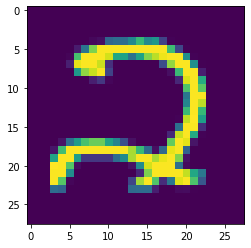

In [30]:
import matplotlib.pyplot as plt
plt.imshow(X[3].view(28,28))
plt.show()

In [31]:
print(torch.argmax(net(X[3].view(-1,784))[0]))

tensor(2)
